Methods and Plan & Computational Code and Output(individual assignment 2)
#### Aryan Jain (Group 35)

## **Introduction**  
The process of securing job placements is influenced by several factors, including academic performance, extracurricular activities, and professional training. Understanding these factors can help students and educators optimize career preparation strategies. This proposal aims to explore the key determinants of placement success using a dataset of student records.  

## **Dataset Description**  
The dataset consists of **10,000 observations** with **12 variables**, including academic performance (CGPA, SSC_Marks, HSC_Marks), skill development (Internships, Projects, Workshops/Certifications), and soft skills (AptitudeTestScore, SoftSkillsRating). It also includes categorical factors such as PlacementTraining, ExtracurricularActivities, and the final PlacementStatus (Placed/NotPlaced). 




## Variables:

These are the variables that have been provided to us.
1. **StudentID :** Unique identifier for each student.  
2. **CGPA :** Cumulative Grade Point Average.  
3. **Internships :** Number of internships completed.  
4. **Projects :** Number of projects completed.  
5. **Workshops/Certifications :** Number of workshops or certifications attended.  
6. **AptitudeTestScore :** Score on the aptitude test.  
7. **SoftSkillsRating :** Rating of soft skills.  
8. **ExtracurricularActivities :** Whether the student participated in extracurricular activities (Yes/No).  
9. **PlacementTraining :** Whether the student underwent placement training (Yes/No).  
10. **SSC_Marks :** Marks obtained in secondary school.  
11. **HSC_Marks :** Marks obtained in higher secondary school.  
12. **PlacementStatus :** Whether the student was placed or not (Placed/NotPlaced).  



In [17]:
library(tidyverse)
library(dplyr)
library(broom)
library(leaps)
library(glmbb)
library(ggplot2)
library(gridExtra)
library(caret)
library(pROC)
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [14]:


# Raw GitHub URL (note the change from "blob" to "raw")
url <- "https://raw.githubusercontent.com/Aryan-SeongJae/Placement_data_R/main/data/placementdata.csv"

# Read the data
placement_data <- read_csv(url)

# Preview the data
head(placement_data)


Rows: 10000 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ExtracurricularActivities, PlacementTraining, PlacementStatus
dbl (9): StudentID, CGPA, Internships, Projects, Workshops/Certifications, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


StudentID CGPA Internships Projects Workshops/Certifications
1 1         7.5  1           1        1                       
2 2         8.9  0           3        2                       
3 3         7.3  1           2        2                       
4 4         7.5  1           1        2                       
5 5         8.3  1           2        2                       
6 6         7.0  0           2        2                       
  AptitudeTestScore SoftSkillsRating ExtracurricularActivities
1 65                4.4              No                       
2 90                4.0              Yes                      
3 82                4.8              Yes                      
4 85                4.4              Yes                      
5 86                4.5              Yes                      
6 71                4.2              Yes                      
  PlacementTraining SSC_Marks HSC_Marks PlacementStatus
1 No                61        79        NotPlaced      
2 Yes               78        82        Placed         
3 No                79        80        NotPlaced      
4 Yes               81        80        Placed         
5 Yes               74        88        Placed         
6 No                55        66        NotPlaced

## DATA PREPROCESSING

We need to convert all the categorical variables to factors

In [15]:
# Overview of dataset
glimpse(placement_data)

# Checking missing values
sum(is.na(placement_data))


Rows: 10,000
Columns: 12
$ StudentID                  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ CGPA                       <dbl> 7.5, 8.9, 7.3, 7.5, 8.3, 7.0, 7.7, 7.7, 6.5…
$ Internships                <dbl> 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1…
$ Projects                   <dbl> 1, 3, 2, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 1, 1…
$ `Workshops/Certifications` <dbl> 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1…
$ AptitudeTestScore          <dbl> 65, 90, 82, 85, 86, 71, 76, 85, 84, 79, 90,…
$ SoftSkillsRating           <dbl> 4.4, 4.0, 4.8, 4.4, 4.5, 4.2, 4.0, 3.5, 3.9…
$ ExtracurricularActivities  <chr> "No", "Yes", "Yes", "Yes", "Yes", "Yes", "N…
$ PlacementTraining          <chr> "No", "Yes", "No", "Yes", "Yes", "No", "No"…
$ SSC_Marks                  <dbl> 61, 78, 79, 81, 74, 55, 62, 59, 75, 85, 82,…
$ HSC_Marks                  <dbl> 79, 82, 80, 80, 88, 66, 65, 72, 71, 86, 88,…
$ PlacementStatus            <chr> "NotPlaced", "Placed", "NotPlaced", "Placed…


[1] 0


## **Research Question**  
The main question to be addressed is:  
*"What factors are associated with a student’s *placement status** based on academic performance, skill development, and training?"*

This analysis will focus on **both inference and prediction**—understanding which factors contribute to placement success while also assessing the probability of a student getting placed based on their attributes.  

## EDA

In [18]:
# Convert categorical variables to factors
placement_data <- placement_data %>%
  mutate(
    PlacementStatus = factor(PlacementStatus, levels = c("NotPlaced", "Placed")),
    ExtracurricularActivities = factor(ExtracurricularActivities, levels = c("No", "Yes")),
    PlacementTraining = factor(PlacementTraining, levels = c("No", "Yes"))
  )

# Normalize AptitudeTestScore for consistent plotting (0–1 scale)
placement_data$AptitudeTestScore <- rescale(placement_data$AptitudeTestScore, to = c(0, 1))

# Remove any invalid CGPA values (just in case)
placement_data <- placement_data %>%
  filter(CGPA >= 0 & CGPA <= 10)

## Methods and Planning

To determine which factors contribute most to placement, we fit a logistic regression model.

In [19]:
# Convert categorical variables to factors
placement_data$PlacementStatus <- factor(placement_data$PlacementStatus, levels = c("NotPlaced", "Placed"))
placement_data$PlacementTraining <- factor(placement_data$PlacementTraining, levels = c("No", "Yes"))
placement_data$ExtracurricularActivities <- factor(placement_data$ExtracurricularActivities, levels = c("No", "Yes"))

In [20]:
model <- glm(PlacementStatus ~ CGPA + AptitudeTestScore + Internships + Projects + PlacementTraining, 
             data = placement_data, family = binomial)

# Summary of the model
summary(model)

tidy(model)




Call:
glm(formula = PlacementStatus ~ CGPA + AptitudeTestScore + Internships + 
    Projects + PlacementTraining, family = binomial, data = placement_data)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -10.27173    0.35000 -29.348  < 2e-16 ***
CGPA                   0.71440    0.04719  15.140  < 2e-16 ***
AptitudeTestScore      3.23089    0.12696  25.448  < 2e-16 ***
Internships            0.14535    0.04056   3.584 0.000339 ***
Projects               0.57155    0.03408  16.773  < 2e-16 ***
PlacementTrainingYes   1.08678    0.06772  16.048  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13603.9  on 9999  degrees of freedom
Residual deviance:  9278.8  on 9994  degrees of freedom
AIC: 9290.8

Number of Fisher Scoring iterations: 5


term                 estimate    std.error  statistic  p.value      
1 (Intercept)          -10.2717258 0.34999532 -29.348180 2.520770e-189
2 CGPA                   0.7144008 0.04718659  15.139912  8.833129e-52
3 AptitudeTestScore      3.2308936 0.12696190  25.447741 7.477870e-143
4 Internships            0.1453491 0.04056011   3.583547  3.389599e-04
5 Projects               0.5715461 0.03407543  16.772968  3.848009e-63
6 PlacementTrainingYes   1.0867779 0.06772170  16.047705  5.931730e-58

The correlation coefficient (r) between CGPA and placement is 0.71, with a p-value less than 2e-16. This indicates a strong positive relationship. For every unit increase in CGPA, the log-odds of placement increase by 0.71.

Aptitude scores significantly boost placement chances, as shown by the study. A 10-point increase in aptitude score leads to a 1.07 increase in the log-odds of placement.

Internships positively impact job placement, though less than CGPA and aptitude scores. An extra internship increases placement likelihood by **0.145**.

Projects significantly contribute to placement, as shown by the p-value of 3.848009e-63. Each additional project increases the log-odds by 0.57, emphasizing projects’ crucial role.
Placement training significantly increases students’ likelihood of securing a placement. The training raises the log-odds of placement by **1.08**, making it a strong predictor.


Setting levels: control = NotPlaced, case = Placed

Setting direction: controls < cases

`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


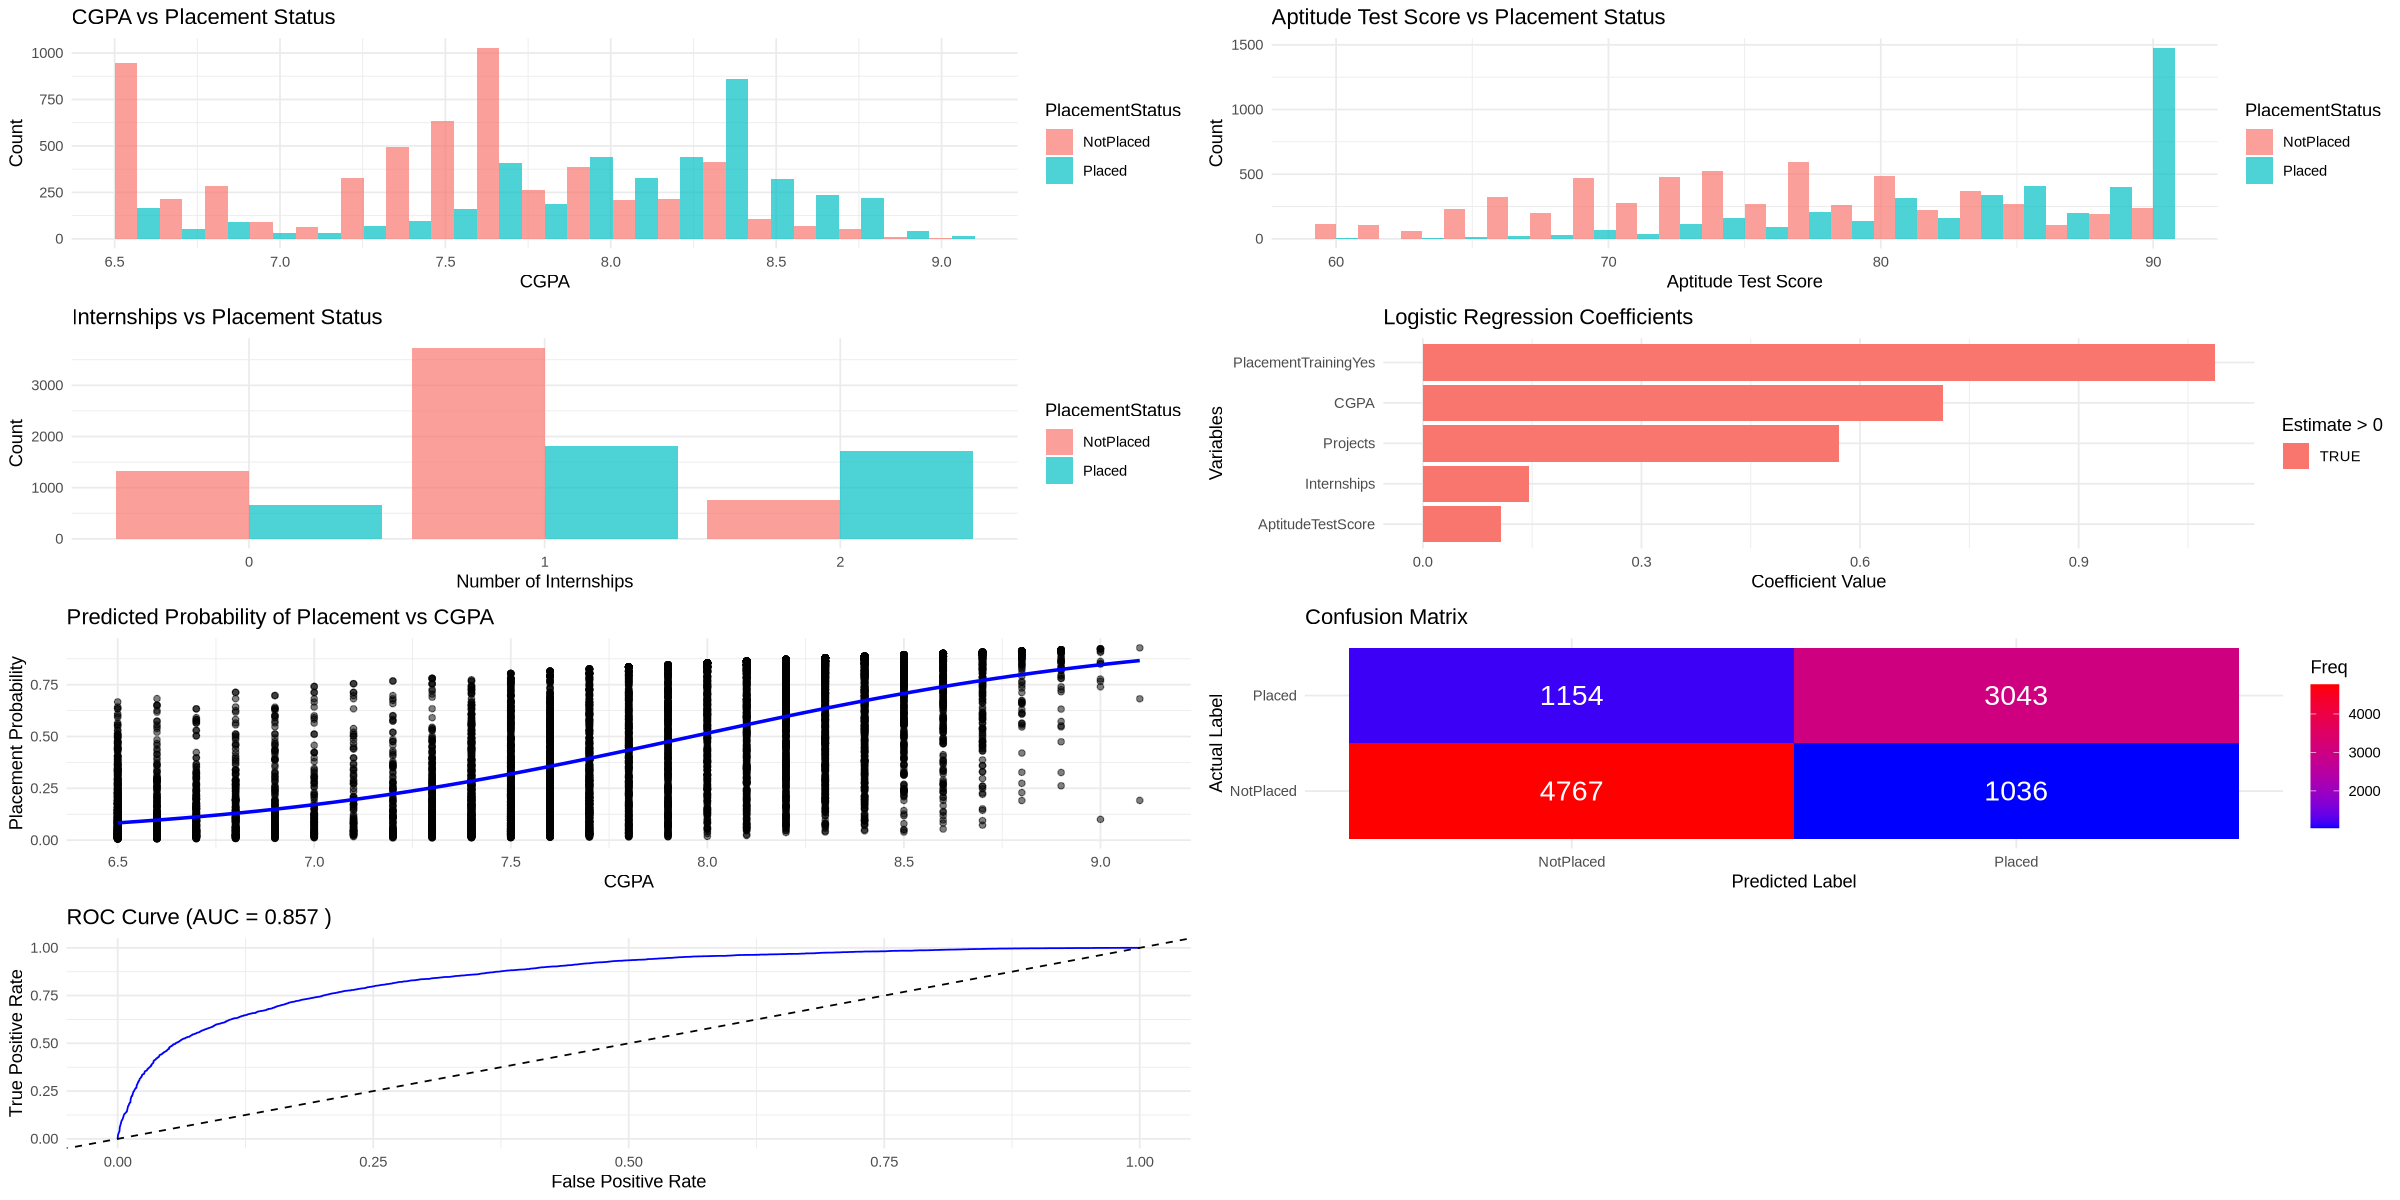

In [10]:
# Convert fitted values to predicted probabilities
placement_data$predicted_prob <- predict(model, type = "response")
options(repr.plot.width = 20, repr.plot.height = 10)

# CGPA vs Placement Status
p1 <- ggplot(placement_data, aes(x = CGPA, fill = PlacementStatus)) +
  geom_histogram(position = "dodge", bins = 20, alpha = 0.7) +
  labs(title = "CGPA vs Placement Status", x = "CGPA", y = "Count") +
  theme_minimal()

# Aptitude Test Score vs Placement Status
p2 <- ggplot(placement_data, aes(x = AptitudeTestScore, fill = PlacementStatus)) +
  geom_histogram(position = "dodge", bins = 20, alpha = 0.7) +
  labs(title = "Aptitude Test Score vs Placement Status", x = "Aptitude Test Score", y = "Count") +
  theme_minimal()

# Internships vs Placement Status
p3 <- ggplot(placement_data, aes(x = as.factor(Internships), fill = PlacementStatus)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  labs(title = "Internships vs Placement Status", x = "Number of Internships", y = "Count") +
  theme_minimal()

# Coefficient Plot
coef_placement_data <- as.data.frame(coef(summary(model)))
coef_placement_data$Variable <- rownames(coef_placement_data)
p4 <- ggplot(coef_placement_data[-1,], aes(x = reorder(Variable, Estimate), y = Estimate, fill = Estimate > 0)) +
  geom_col() +
  coord_flip() +
  labs(title = "Logistic Regression Coefficients", x = "Variables", y = "Coefficient Value") +
  theme_minimal()

# Predicted Probabilities vs CGPA
p5 <- ggplot(placement_data, aes(x = CGPA, y = predicted_prob)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color = "blue") +
  labs(title = "Predicted Probability of Placement vs CGPA", x = "CGPA", y = "Placement Probability") +
  theme_minimal()

# Confusion Matrix
predicted_classes <- ifelse(placement_data$predicted_prob > 0.5, "Placed", "NotPlaced")
placement_data$Predicted <- factor(predicted_classes, levels = c("NotPlaced", "Placed"))
conf_matrix <- table(Predicted = placement_data$Predicted, Actual = placement_data$PlacementStatus)
p6 <- ggplot(as.data.frame(conf_matrix), aes(x = Predicted, y = Actual, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  labs(title = "Confusion Matrix", x = "Predicted Label", y = "Actual Label") +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_minimal()

# ROC Curve & AUC (Using pROC instead of ROCR)
roc_obj <- roc(placement_data$PlacementStatus, placement_data$predicted_prob)
auc_value <- auc(roc_obj)
roc_placement_data <- data.frame(FPR = 1 - roc_obj$specificities, TPR = roc_obj$sensitivities)

p7 <- ggplot(roc_placement_data, aes(x = FPR, y = TPR)) +
  geom_line(color = "blue") +
  geom_abline(linetype = "dashed") +
  labs(title = paste("ROC Curve (AUC =", round(auc_value, 3), ")"),
       x = "False Positive Rate", y = "True Positive Rate") +
  theme_minimal()

# Arrange plots in a grid
grid.arrange(p1, p2, p3, p4, p5, p6, p7, ncol = 2)


The analysis clearly shows that students with **higher CGPA, strong aptitude test scores, and more internships or projects** have a much better chance of getting placed. However, the **biggest game-changer is placement training**, which significantly boosts the likelihood of securing a job. Students who take **internships and hands-on projects** gain a competitive edge, but academic performance remains a **key deciding factor**. While the model does a solid job of predicting placements with **85.7% accuracy**, there are still some misclassifications, suggesting that factors like **soft skills, extracurricular activities, and networking** might also play a role. To maximize placement chances, students should **focus on academics, gain real-world experience through internships, and take advantage of placement training programs**.